<a href="https://colab.research.google.com/github/AShipulin/usurt/blob/main/%D0%9B%D0%9F%D0%A2%D0%A1_%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Интервальный прогноз

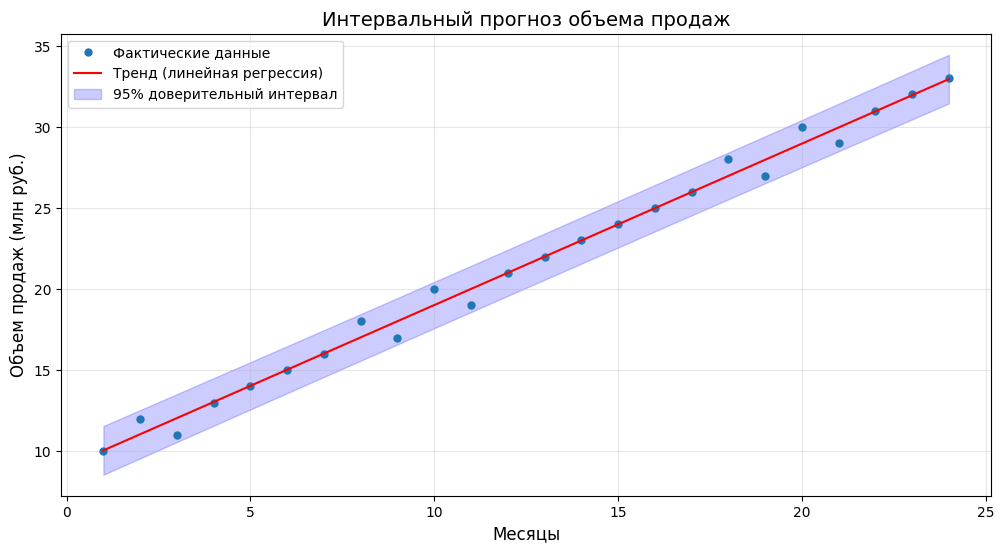

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Исходные данные (например, ежемесячные продажи за 2 года)
months = np.arange(1, 25)
sales = np.array([10, 12, 11, 13, 14, 15, 16, 18, 17, 20, 19, 21,
                  22, 23, 24, 25, 26, 28, 27, 30, 29, 31, 32, 33])

# Линейная регрессия для тренда
coefficients = np.polyfit(months, sales, 1)
trend_line = np.poly1d(coefficients)
trend = trend_line(months)

# Ошибки прогноза (стандартное отклонение остатков)
residuals = sales - trend
std_error = np.std(residuals, ddof=2)  # ddof=2 для несмещенной оценки

# Доверительный интервал (95%)
confidence = 0.95
n = len(months)
t_value = t.ppf((1 + confidence) / 2, df=n-2)  # t-статистика
margin = t_value * std_error * np.sqrt(1 + 1/n + (months - np.mean(months))**2 / np.sum((months - np.mean(months))**2))

# Границы интервала
lower = trend - margin
upper = trend + margin

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(months, sales, 'o', label='Фактические данные', markersize=5)
plt.plot(months, trend, 'r-', label='Тренд (линейная регрессия)')
plt.fill_between(months, lower, upper, color='blue', alpha=0.2, label='95% доверительный интервал')

# Настройки графика
plt.title('Интервальный прогноз объема продаж', fontsize=14)
plt.xlabel('Месяцы', fontsize=12)
plt.ylabel('Объем продаж (млн руб.)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()